In [1]:
import tensorflow as tf

import os
import math
import numpy as np
from PIL import Image
import PIL
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from einops import rearrange, reduce
from fdf256dataset import FDF256Dataset

2023-04-16 13:30:19.945692: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 13:30:20.907140: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Could not load pyspng. Defaulting to pillow image backend.


In [2]:
dataset_path = '/datadrive/FDF/dataset/val'
dataset = FDF256Dataset(dirpath=dataset_path, load_keypoints=True, transform=None)

Dataset loaded from: /datadrive/FDF/dataset/val. Number of samples:6531


In [3]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=22,
                            prefetch_factor=2, persistent_workers=True, pin_memory=True)

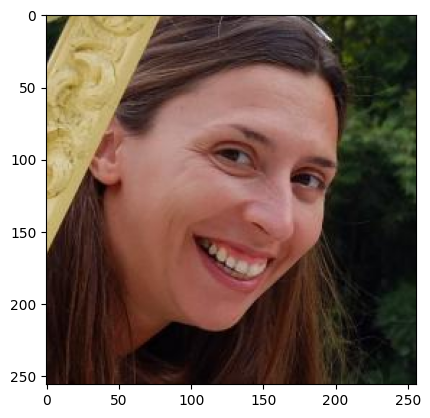

In [41]:
image = next(iter(dataloader))
plt.imshow(image['img'][0])

In [42]:
image['img'].shape

torch.Size([1, 256, 256, 3])

In [43]:
torch.squeeze(image['img']).shape

torch.Size([256, 256, 3])

In [44]:
import torchvision.transforms as T
import torch
from einops import rearrange

im = reduce(image['img'], "1 h w c -> c h w", 'max')

transform = T.ToPILImage()
image = transform(im)

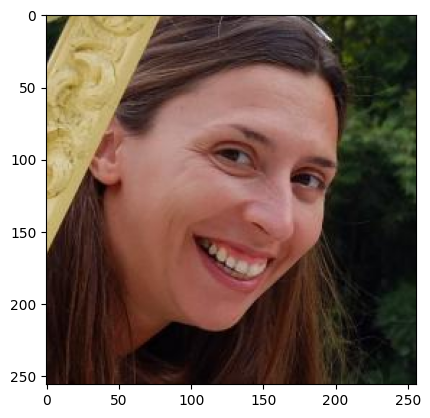

In [45]:
plt.imshow(image)

In [6]:
from ESPCN import run_model

run_model(model_path="/datadrive/AACS2023/ESPCN/ESPCN_model", images=image_tensor)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'resize'